In [1]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


Heute=dt.datetime.now().strftime('%y-%m-%d')

pd.options.display.max_colwidth = 200

FileName="Nano-compare"


def normalize(x): 
    return (x-x.min())/(x.max()-x.min())

filename=Heute+"_NYtimes_"+FileName.replace(" ","_")



def openFile(filename):
    with open(filename) as json_file:
        data = json.load(json_file)
    return data
        
        
def writeFile(filename, data):
    def defaultconverter(o):
        if isinstance(o, datetime.datetime):
            return o.__str__()

    with open(filename, 'w') as fp:
        json.dump(data,fp, default = defaultconverter)
    

In [2]:
SuchListe=["A","B", "C"]

SuchName=""" "Internet Telephony" OR "VoIP" """

""" OR """.join(["""" """+i+"""" """ for i in SuchListe]).strip()


'" A"  OR " B"  OR " C"'

In [3]:
VoIP2=openFile("22-05-30_NYtimes_InternetTelephony.json")
Nano=openFile("22-05-24_NYtimes_nano.json")

In [4]:
df_algae=pd.read_json("22-05-24_NYtimes_microalgae.json")

In [15]:
df_VoIP=pd.read_json("22-05-24_NYtimes_VoIP.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_NanoT=pd.read_json("22-05-24_NYtimes_nanotechnology.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_VR=pd.read_json("22-05-24_NYtimes_virtualreality.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_gene=pd.read_json("22-05-24_NYtimes_genetherapy.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_superC=pd.read_json("22-05-24_NYtimes_superconductivity.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_nano=pd.read_json("22-05-24_NYtimes_nano.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_3dprinting=pd.read_json("22-05-24_NYtimes_3dprinting.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")
df_algae=pd.read_json("22-05-24_NYtimes_microalgae.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")


### concat VoIP and internet telephony. aswell VR1 and VR2 (due to API meta data max)

df_VoIP2=pd.read_json("22-05-30_NYtimes_InternetTelephony.json", convert_dates=['pub_date'])
df_VoIP=pd.concat([df_VoIP,df_VoIP2]).drop_duplicates("web_url",keep="first")


df_VR2=pd.read_json("22-05-24_NYtimes_vr2.json", convert_dates=['pub_date'])
df_VR=pd.concat([df_VR,df_VR2]).drop_duplicates("web_url",keep="first")

df_VoIP2=pd.read_json("22-05-30_NYtimes_InternetTelephony.json", convert_dates=['pub_date'])
df_VoIP=pd.concat([df_VoIP,df_VoIP2]).drop_duplicates("web_url",keep="first")



df_ChatGPT=pd.read_json("23-05-06_NYtimes_ChatGPT.json", convert_dates=['pub_date']).drop_duplicates("web_url",keep="first")

In [6]:
df_NanoT.type_of_material.value_counts()[:8]


News               765
Review              43
Op-Ed               29
Schedule            23
Summary             21
Correction          13
Web Log             12
Obituary (Obit)     10
Name: type_of_material, dtype: int64

In [7]:
type_of_material="News"

df_NanoT=df_NanoT[df_NanoT.type_of_material==type_of_material]
df_VoIP=df_VoIP[df_VoIP.type_of_material==type_of_material]
df_VoIP2=df_VoIP2[df_VoIP2.type_of_material==type_of_material]

df_VR=df_VR[df_VR.type_of_material==type_of_material]
df_gene=df_gene[df_gene.type_of_material==type_of_material]
df_superC=df_superC[df_superC.type_of_material==type_of_material]
df_nano=df_nano[df_nano.type_of_material==type_of_material]
df_3dprinting=df_3dprinting[df_3dprinting.type_of_material==type_of_material]
df_algae=df_algae[df_algae.type_of_material==type_of_material]


<AxesSubplot: xlabel='pub_date'>

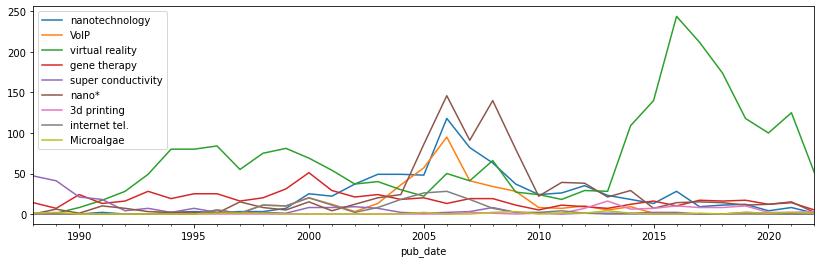

In [8]:
sample="Y"

nanoT=df_NanoT.set_index("pub_date").resample(sample).size().rename('nanotechnology')
voip=df_VoIP.set_index("pub_date").resample(sample).size().rename('VoIP')
voip2=df_VoIP2.set_index("pub_date").resample(sample).size().rename('internet tel.')

vr=df_VR.set_index("pub_date").resample(sample).size().rename('virtual reality')
printing=df_3dprinting.set_index("pub_date").resample(sample).size().rename('3d printing')
gene=df_gene.set_index("pub_date").resample(sample).size().rename('gene therapy')
superC=df_superC.set_index("pub_date").resample(sample).size().rename('super conductivity')
nano=df_nano.set_index("pub_date").resample(sample).size().rename('nano*')
algae=df_algae.set_index("pub_date").resample(sample).size().rename('Microalgae')



comp=pd.DataFrame(nanoT).join(voip).join(vr).join(gene).join(superC).join(nano).join(printing).join(voip2).join(algae).fillna(0)

comp[comp.index.year>1986].plot(figsize=(14,4))

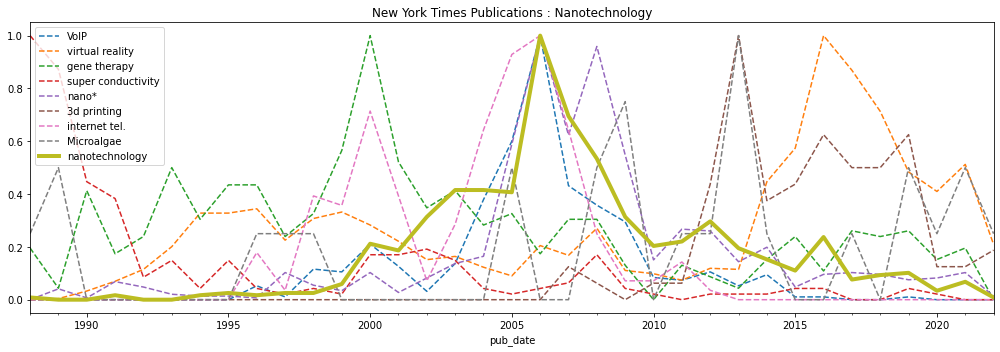

In [9]:
comp2=comp.apply(normalize)

comp2[comp2.index.year>1986].iloc[:,1:].plot(legend=True,figsize=(14, 5),style="--")

comp2[comp2.index.year>1986].iloc[:,0].plot(legend=True,figsize=(14, 5),lw=4, title="New York Times Publications : Nanotechnology")


plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.savefig(filename+'hist_Y_all.pdf')


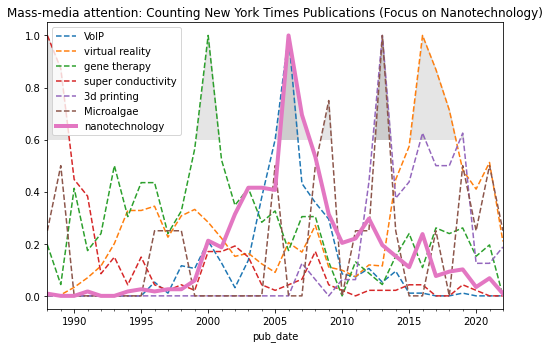

In [10]:
comp2=comp.apply(normalize)

TechListe=['nanotechnology', 'VoIP', 'virtual reality', 'gene therapy','super conductivity', '3d printing', 'Microalgae']
comp2[TechListe][comp2.index.year>1986].iloc[:,1:].plot(legend=True,figsize=(7, 5),style="--")

comp2[comp2.index.year>1986].iloc[:,0].plot(legend=True,figsize=(7, 5),lw=4, title="Mass-media attention: Counting New York Times Publications (Focus on Nanotechnology)")

for i in TechListe:
    plt.fill_between(comp2.index, comp2[i], color='black', alpha=0.1)
    plt.fill_between(comp2.index, 0.6, color='white', alpha=1)

plt.tight_layout(pad=1.28, h_pad=None, w_pad=None, rect=None)
plt.savefig(filename+'hist_Y_g.jpg', dpi=300)

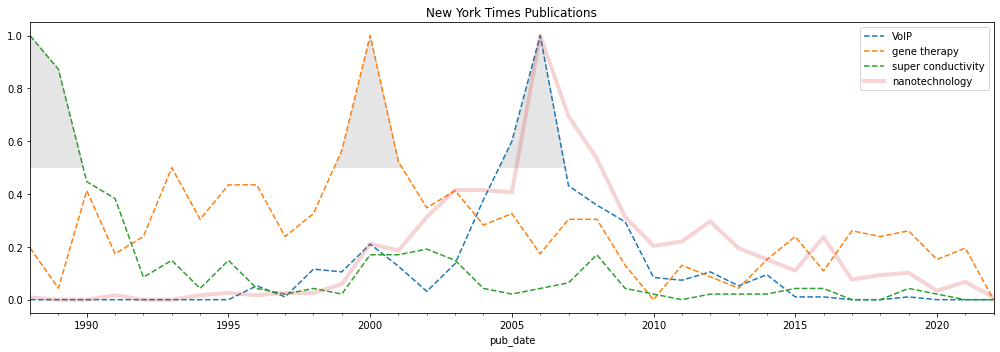

In [11]:
comp2=comp.apply(normalize)

comp3=comp2[comp2.index.year>1986][["VoIP","gene therapy", "super conductivity"]]
comp3.plot(legend=True,figsize=(14, 5),style="--")

#comp2[comp2.index.year>1986].iloc[:,0].plot(legend=True,figsize=(14, 5),lw=4, title="New York Times Publications : Nanotechnology")

comp2[comp2.index.year>1986].iloc[:,0].plot(legend=True, alpha=0.2, figsize=(14, 5),lw=4, title="New York Times Publications")


for i in comp3.columns:
    plt.fill_between(comp3.index, comp3[i], color='black', alpha=0.1)
    plt.fill_between(comp3.index, 0.5, color='white', alpha=1)

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.savefig(Heute+'_HypePaper_hist_Y_g.pdf')

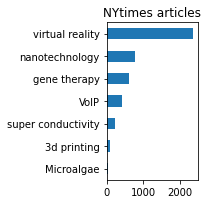

In [12]:
TechListe=['nanotechnology', 'VoIP', 'virtual reality', 'gene therapy','super conductivity', '3d printing', 'Microalgae']


comp[TechListe].sum().sort_values().plot.barh(title="NYtimes articles", figsize=(3, 3))
plt.tight_layout(pad=1.28, h_pad=None, w_pad=None, rect=None)
plt.savefig(filename+'barh.jpg', dpi=300)

# Pre-/after-Peak

In [13]:
Timespots=["2000","2006","2010"]

def BeforeAfter(df,Timespots):
    A=df.loc[(df.pub_date > Timespots[0]) & (df.pub_date <= Timespots[1])]
    B=df.loc[(df.pub_date > Timespots[1]) & (df.pub_date <= Timespots[2])]
    return A,B

A,B=BeforeAfter(df_VoIP,Timespots)


In [14]:
A["abstract"], B["abstract"]

(2       ADIR VOIP TECHNOLOGIES, Newark, a software company, has agreed to buy the NetSpeak Corp., Boca Raton, Fla., for $46.5 million to $48.2 million to add software for sending telephone calls and vide...
 6                               SEOUL—  Kim Dae Sun, vice president of Serome Technology Inc., avoided the usual euphemisms for the disasters that have befallen his once pioneering and high-flying company. 
 8                                           Much to the regret of serious technologists — not to mention consumers — the words "technology" and "hype" have become virtually synonymous over the past decade. 
 9      Article describes using computer for cheap or even free local and long-distance telephone service using Internet connection rather than telephone lines; reviews equipment needed; finds call qualit...
 10                                                              Ken Belson, a correspondent for The New York Times in Tokyo, spoke with Korea Telecom's president and c